<a href="https://colab.research.google.com/github/NRafif/Machine-Learning/blob/main/MobileNetV2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LIBRARY

In [1]:
from google.colab import files    # Untuk upload files
import zipfile                    # Untuk unzip file
import os                         # Untuk interaksi dengan os
import matplotlib.pyplot as plt   # Untuk visualisasi data
import matplotlib.image as mpimg  # Membaca dan memanipulasi gambar
from google.colab import drive    # Untuk mengakses google drive
import tensorflow as tf           # Library utama untuk Machine learning
import numpy as np                # Library untuk komputasi numerik
from PIL import Image
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications import MobileNetV2

In [2]:
# This should show version 2.2 to match the autograder
print('\u2022 Using TensorFlow Version:', tf.__version__)

• Using TensorFlow Version: 2.17.1


In [3]:
batch_size = 64
img_height = 224
img_width = 224

# PERSIAPAN DATASET


Mengambil dataset dari kaggle

In [4]:
!pip install -q Kaggle

In [5]:
# uploaded = files.upload()

In [6]:
!mkdir -p ~/.kaggle                #membuat folder .kaggle di root
!mv kaggle.json ~/.kaggle/         #memindahkan file kaggle.json ke folder ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json   #merubah permission file kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [7]:
!kaggle datasets download -d adityavahreza/cat-skin-disease-v2

Dataset URL: https://www.kaggle.com/datasets/adityavahreza/cat-skin-disease-v2
License(s): unknown
 80% 73.0M/91.4M [00:00<00:00, 191MB/s]
100% 91.4M/91.4M [00:00<00:00, 184MB/s]


Load Dataset


In [8]:
# Extract zipfile
! unzip "/content/cat-skin-disease-v2.zip" -d.

Archive:  /content/cat-skin-disease-v2.zip
  inflating: ./CAT SKIN DISEASE/Health/-XB1nkYr8x8_jpg.rf.488035c88ae23b7e516202935dcd5cb4.jpg  
  inflating: ./CAT SKIN DISEASE/Health/-e0QDP4sFro_jpg.rf.79e7e30bdb48ec52d1174ef79c91b9ff.jpg  
  inflating: ./CAT SKIN DISEASE/Health/-q6SDw4zo90_jpg.rf.a50638511d43faa8b2d1b745421a5b1e.jpg  
  inflating: ./CAT SKIN DISEASE/Health/0001-YE-pDvdMSPU_jpg.rf.8e5c96d008a7de691af15f13c9c91741.jpg  
  inflating: ./CAT SKIN DISEASE/Health/0002-Kpmi7OMZGco_jpg.rf.25bb175383508dbc050f3a7a008cb384.jpg  
  inflating: ./CAT SKIN DISEASE/Health/0002-Kpmi7OMZGco_jpg.rf.792af3151465d9328ca952010a6cb8d4.jpg  
  inflating: ./CAT SKIN DISEASE/Health/0002-Kpmi7OMZGco_jpg.rf.ce000713629e2557290f208d0f713cbf.jpg  
  inflating: ./CAT SKIN DISEASE/Health/0003-Zx043ICtTtE_jpg.rf.442aed9b79f485296363ce85eca07b2e.jpg  
  inflating: ./CAT SKIN DISEASE/Health/0003-Zx043ICtTtE_jpg.rf.82e3d5fcf5815fa024e03416498d4b65.jpg  
  inflating: ./CAT SKIN DISEASE/Health/0003-Zx043ICtTt

Menentukan class

In [9]:
cat_disease = "/content/CAT SKIN DISEASE"
cat_disease_classes = os.listdir(cat_disease)

In [10]:
print("Cat Skin Disease Class :")
for class_name in cat_disease_classes:
  if os.path.isdir(os.path.join(cat_disease, class_name)):
    print(class_name)

Cat Skin Disease Class :
Lepra
Health
Scabies
Ringworm


Preview Gambar


Lepra
Total Image :  437
Resolusi Gambar :  (214, 286, 3)


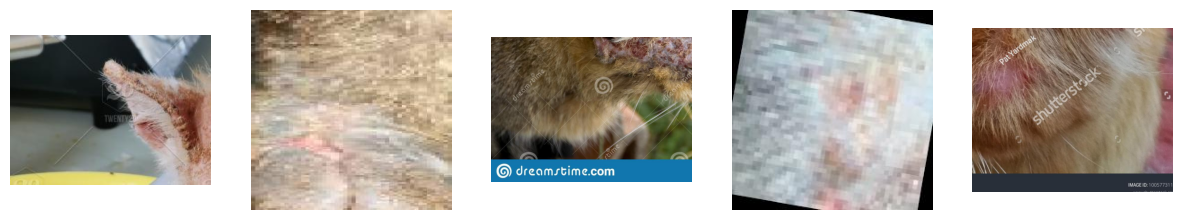


Health
Total Image :  503
Resolusi Gambar :  (640, 640, 3)


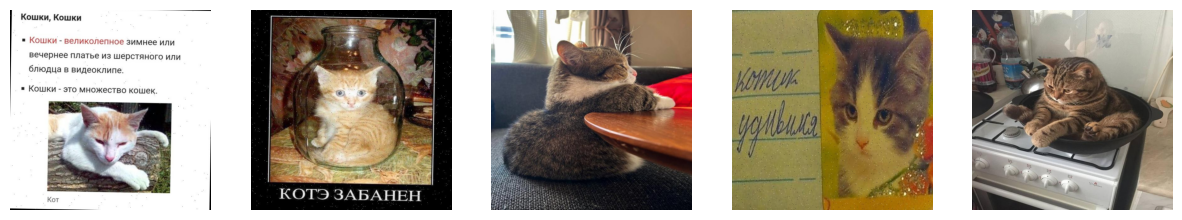


Scabies
Total Image :  509
Resolusi Gambar :  (640, 640, 3)


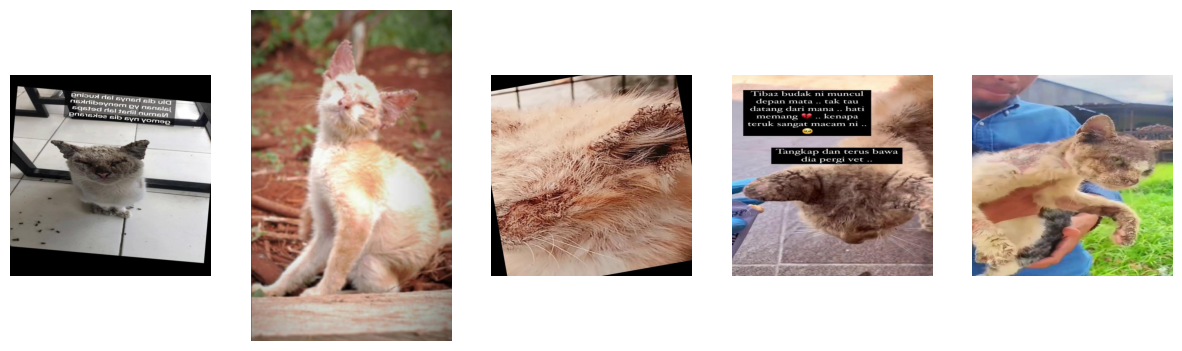


Ringworm
Total Image :  572
Resolusi Gambar :  (640, 640, 3)


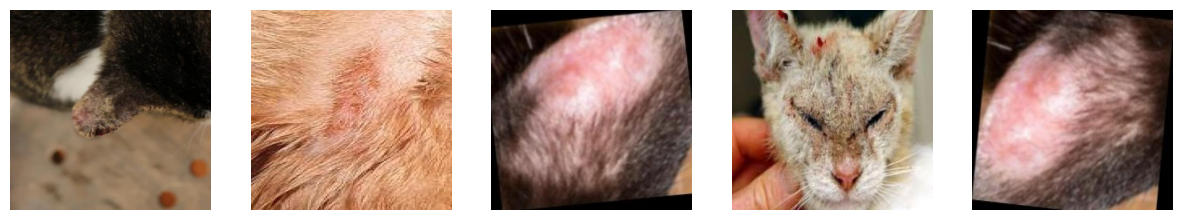

In [11]:
for item in cat_disease_classes:
    print("")
    print(item)
    class_dir = os.path.join(cat_disease, item)
    class_images = [img for img in os.listdir(class_dir) if img.endswith(('.png', '.jpg', '.jpeg'))]

    # Menghitung total image di setiap kelas
    num_images = len(class_images)
    print("Total Image : ", num_images)

    # Menghitung resolusi pada gambar pertama
    img_path = os.path.join(class_dir, class_images[0])
    img = mpimg.imread(img_path)
    image_shape = img.shape
    print("Resolusi Gambar : ", image_shape)

    # Menampilkan beberapa gambar
    plt.figure(figsize=(15, 5))
    for i in range(min(5, len(class_images))):  # Tampilkan maksimum 5 gambar atau sesuai jumlah yang tersedia
        sp = plt.subplot(1, 5, i + 1)
        img = mpimg.imread(os.path.join(class_dir, class_images[i]))
        plt.axis('off')
        plt.imshow(img)
    plt.show()


# PREPOCESING DATA


Split data

In [12]:
def train_val_Dataset():
  training_dataset, validation_dataset = tf.keras.utils.image_dataset_from_directory(
      cat_disease,
      image_size=(img_height, img_width),
      color_mode='rgb',
      batch_size= batch_size,
      label_mode='categorical',
      validation_split=0.2,
      subset='both',
      seed=42
  )

  return training_dataset, validation_dataset

In [13]:
# Membuat dataset
training_dataset, validation_dataset = train_val_Dataset()

Found 2021 files belonging to 4 classes.
Using 1617 files for training.
Using 404 files for validation.


In [14]:
# Melihat batch pertama dari image dan labels
for image_batch, labels_batch in training_dataset.take(1):
  example_batch = image_batch
  labels_batch = labels_batch

  print(f"maximum pixel value of images : {np.max(example_batch)}.\n")
  print(f"Image batch shape: {image_batch.shape}")
  print(f"Labels batch shape: {labels_batch.shape}")

maximum pixel value of images : 255.0.

Image batch shape: (64, 224, 224, 3)
Labels batch shape: (64, 4)


Augmentation

In [15]:
def create_augmentation_model():
    augmentation_model = tf.keras.Sequential([
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.3),
        tf.keras.layers.RandomZoom(0.3),
        tf.keras.layers.RandomContrast(0.3),
        tf.keras.layers.RandomBrightness(0.3),
        tf.keras.layers.RandomTranslation(0.2, 0.2),
    ])
    return augmentation_model


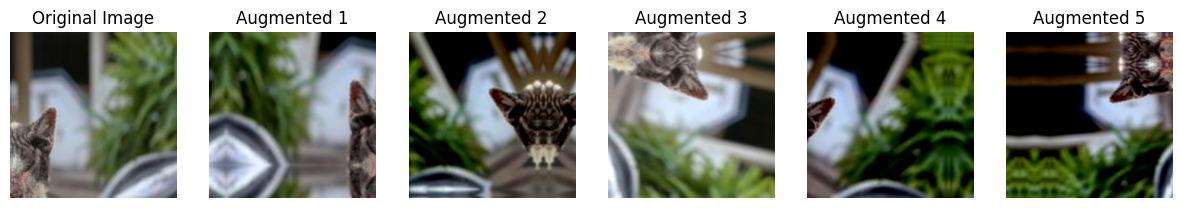

In [16]:
# Load your model for augmentation
data_augmentor = create_augmentation_model()

# Take a sample image
sample_image = tf.keras.utils.array_to_img(example_batch[0])

images = [sample_image]

# Apply random augmentation 5 times
for _ in range(5):
	image_aug = data_augmentor(tf.expand_dims(sample_image, axis=0))
	image_aug = tf.keras.utils.array_to_img(tf.squeeze(image_aug))
	images.append(image_aug)


fig, axs = plt.subplots(1, 6, figsize=(15, 5))
for ax, image, title in zip(axs, images, ['Original Image', 'Augmented 1', 'Augmented 2', 'Augmented 3','Augmented 4','Augmented 5']):
    ax.imshow(image, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.show()

# MODELING

In [17]:
def create_transfer_learning_model():
    # Load MobileNetV2 without the top layer
    base_model = MobileNetV2(
        input_shape=(img_height, img_width, 3),
        include_top=False,
        weights="imagenet"
    )

    # Freeze the base model
    base_model.trainable = False

    # Augmentation layers
    augmentation_layers = create_augmentation_model()

    # Add custom layers
    # The Input layer is added to specify the input shape explicitly
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(shape=(img_height, img_width, 3)),
        augmentation_layers,
        tf.keras.layers.Rescaling(1./255),
        base_model,  # Pretrained model
        tf.keras.layers.Flatten(),  # Replace Flatten
        tf.keras.layers.Dropout(0.2),  # Regularization
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dense(4, activation="softmax")  # Output layer
    ])

    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model

In [18]:
create_transfer_learning_model().summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 62720)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 62720)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      32,113,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,373,188 (131.12 MB)

 Trainable params: 32,115,204 (122.51 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Buat fungsi callback

In [19]:
class early_stopping_callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    if logs.get('accuracy')>=0.9 and logs.get('val_accuracy')>=0.9:
      print("\nReached 90% train accuracy and 90% accuracy so cancelling training!")
      self.model.stop_training = True

Mulai train model

In [20]:
history = create_transfer_learning_model().fit(
    training_dataset,
    validation_data=validation_dataset,
    epochs=100,
    callbacks=[early_stopping_callback()]
)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 15s 239ms/step - accuracy: 0.4352 - loss: 4.0295 - val_accuracy: 0.7252 - val_loss: 0.7003
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 251ms/step - accuracy: 0.6970 - loss: 0.7246 - val_accuracy: 0.8317 - val_loss: 0.4705
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 152ms/step - accuracy: 0.7618 - loss: 0.6163 - val_accuracy: 0.7995 - val_loss: 0.4960
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 151ms/step - accuracy: 0.7696 - loss: 0.5819 - val_accuracy: 0.8218 - val_loss: 0.4778
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 203ms/step - accuracy: 0.7969 - loss: 0.5343 - val_accuracy: 0.8366 - val_loss: 0.5150
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step - accuracy: 0.7885 - loss: 0.5187 - val_accuracy: 0.8564 - val_loss: 0.4184
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 168ms/step - accuracy: 0.8123 - loss: 0.4939 - val_accuracy: 0.8564 - val_loss: 0.4034
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 182ms/step - accuracy: 0.8140 - loss: 0.4615 - val_acc

# Hasil Model

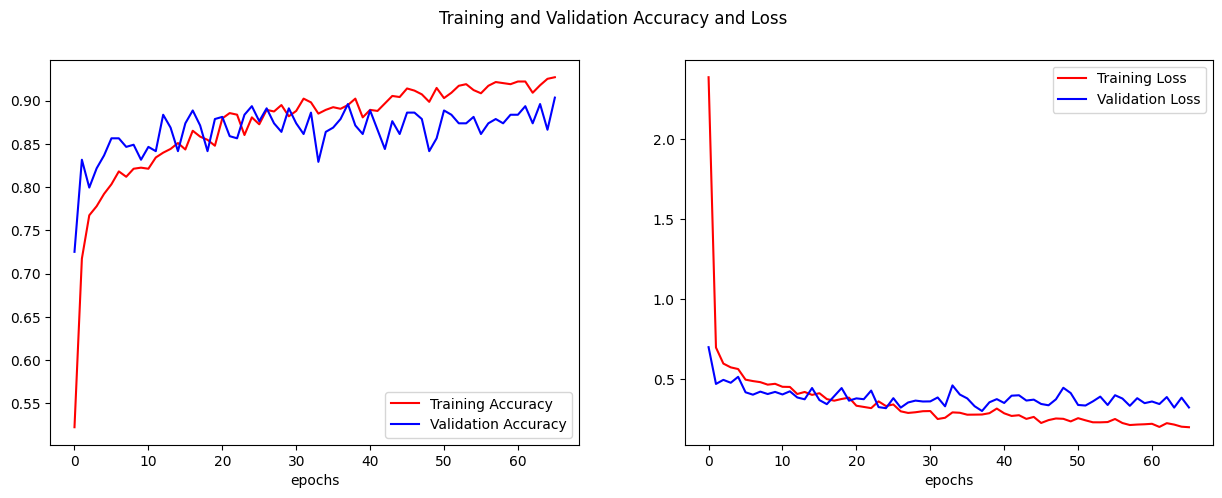

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Training and Validation Accuracy and Loss')

# Define data and labels for each subplot
data_labels = [
    (acc, val_acc, 'Accuracy'),
    (loss, val_loss, 'Loss')
]

# Iterate through subplots and data
for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    axs[i].plot(epochs_range, data[0], 'r', label="Training " + label)
    axs[i].plot(epochs_range, data[1], 'b', label="Validation " + label)
    axs[i].legend()
    axs[i].set_xlabel('epochs')

plt.show()

In [22]:
# def predict_image(image_path, model):
#     img = Image.open(image_path)
#     img = img.resize((img_height, img_width))  # Resize image

#     # Convert image to RGB format
#     img = img.convert('RGB')  # This line is added to convert the image to RGB

#     img_array = np.array(img) / 255.0  # Normalize pixel values
#     img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

#     prediction = model.predict(img_array)
#     predicted_class = np.argmax(prediction)

#     # Memprediksi kelas yang
#     predicted_class_name = cat_disease_classes[predicted_class]

#     return predicted_class_name, prediction


# # Upload file
# uploaded = files.upload()

# # Informasi file yang diupload
# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

# # Membuat prediksi
# image_path = fn # Menggunakan nama file yang diupload
# predicted_class_name, prediction = predict_image(image_path, create_transfer_learning_model()) # Gunakan model yang telah dilatih

# print(f"Predicted class: {predicted_class_name}")
# print(f"Prediction probabilities: {prediction}")

# # Display the uploaded image
# img = Image.open(image_path)
# plt.imshow(img)
# plt.axis('off')
# plt.title(f"Prediction: {predicted_class_name}")
# plt.show()

In [23]:
# def predict_image(image_path, model):
#     img = Image.open(image_path)
#     img = img.resize((img_height, img_width))  # Resize image

#     # Convert image to RGB format
#     img = img.convert('RGB')  # This line is added to convert the image to RGB

#     img_array = np.array(img) / 255.0  # Normalize pixel values
#     img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

#     prediction = model.predict(img_array)
#     predicted_class = np.argmax(prediction)

#     # Memprediksi kelas yang
#     predicted_class_name = cat_disease_classes[predicted_class]

#     return predicted_class_name, prediction


# # Upload file
# uploaded = files.upload()

# # Informasi file yang diupload
# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

# # Membuat prediksi
# image_path = fn # Menggunakan nama file yang diupload
# predicted_class_name, prediction = predict_image(image_path, create_transfer_learning_model()) # Gunakan model yang telah dilatih

# print(f"Predicted class: {predicted_class_name}")
# print(f"Prediction probabilities: {prediction}")

# # Display the uploaded image
# img = Image.open(image_path)
# plt.imshow(img)
# plt.axis('off')
# plt.title(f"Prediction: {predicted_class_name}")
# plt.show()

# SAVE MODEL

In [24]:
saved_model_path = "./my_model.keras"

model = create_transfer_learning_model()

model.save(saved_model_path, include_optimizer=False)

In [25]:
# # Buat model terlebih dahulu (misalnya, create_transfer_learning_model())
# model = create_transfer_learning_model()

# # Menyimpan arsitektur model dalam format JSON
# model_json = model.to_json()

# # Menyimpan ke file
# with open("model_architecture.json", "w") as json_file:
#     json_file.write(model_json)


In [26]:
# Konvert model ke TF Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model dalam format TF Lite
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmptz3wcf34'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_499')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  133923289194992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133923287892208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133923287892032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133923287891664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133923287893264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133923287888496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133923287899600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133923287902240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133923287898192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133923287900128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1339232879